#Imbalance Data set DL

In [0]:
# Load basic library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import random

# Load Keras
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dropout

#Load sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF

#ML normal ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#ML ensembles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#Special
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

#Load visual neural:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
# import require packages for plotting
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
%matplotlib inline 


The dataset that we will be using in this exercise consists of data that's been collected
from heavy Scania trucks in everyday usage that have failed in some way. The system
in focus is the Air pressure system (APS), which generates pressurized air that is
utilized in various functions in a truck, such as braking and gear changes. The positive
class in the dataset represents component failures for a specific component in the APS,
while the negative class represents failures for components not related to the APS.

The objective of this exercise is to predict which trucks have had failures due to the APS
so that the repair and maintenance mechanics have the information they can work with
when checking why the truck failed and which area of the truck needs to be inspected.

In [0]:
# Import the libraries
import numpy as np
import pandas as pd
from tensorflow import random

# Load the Data
X = pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-Deep-Learning-with-Keras-Workshop/master/Chapter06/data/aps_failure_training_feats.csv")
y = pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-Deep-Learning-with-Keras-Workshop/master/Chapter06/data/aps_failure_training_target.csv")

# use the head function view the first 5 rows of the data
X.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,...,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,...,0.0,0.0,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,...,0.0,2341048.0,1494.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13876.0,38182.0,8138.0,0.0,0.0,65772.0,10534.0,300240.0,48028.0,0.0,0.0,0.0,0.0,1040120.0,1018.64,1020.0,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,3232.0,1872.0,0.0,0.0,0.0,2668.0,0.0,0.0,0.0,642.0,3894.0,10184.0,7554.0,10764.0,1014.0,0.0,0.0,0.0,0.0,60.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2038.0,...,0.0,2578.0,76.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,0.0,0.0,2014.0,370.0,48.0,18.0,15740.0,1822.0,20174.0,44.0,0.0,0.0,0.0,1.08,54.0,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,0.0,1974038.0,0.0,226.0,0.0,0.0,0.0,3230626.0,2618878.0,1058136.0,551022.0,0.0,0.0,0.0,0.0,1788.0,642.0,0.0,0.0,0.0,0.0,42124.0,372236.0,2128914.0,819596.0,...,0.0,3590004.0,2026.0,444.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44946.0,62648.0,11506.0,0.0,0.0,149474.0,35154.0,457040.0,80482.0,98334.0,27588.0,0.0,0.0,21173050.0,1116.06,1176.0,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [0]:
X.shape

(60000, 170)

In [0]:
# Summary of Numerical Data
X.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,60000.000000,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,...,60000.000000,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.00000,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000
mean,5.933650e+04,0.162500,3.362258e+08,1.434071e+05,6.535000,10.548200,2.191577e+02,9.648104e+02,8.509771e+03,8.760054e+04,4.322084e+05,1.095979e+06,1.639278e+06,4.937259e+05,3.517210e+04,5.057553e+03,1.790474e+06,8.922438e+03,1.131685e+03,9.076607e+02,5.849778e+04,9.230343e+04,3.424004e+06,2.972966e+06,9.934150e+05,4.380615e+05,0.474367,1.254079e+02,5.018874e+03,2.281631e+02,1071.249833,358.724167,1.207508e+04,1.007616e+04,1.085226e+04,7.144976e+03,1.044784e+04,1.107268e+05,1.066489e+06,1.528743e+06,...,10.329033,1.694286e+06,2993.640633,358.115433,2.537033e+03,5.235212e+03,4.392641e+03,3.476130e+04,37.271333,1.737008e+03,2.663518e+04,7.393824e+03,3.335682e+04,2.721359e+04,6642.497933,4.323590e+06,1.945024e+05,8.558018e+04,14703.272200,3.874311e+06,5.668551e+05,7.553008e+05,7.427122e+03,0.205967,1.49660,9.068153e+06,1122.219569,1220.947900,7.252023e+05,7.751083e+05,4.405077e+05,2.087653e+05,4.407495e+05,3.895406e+05,3.293335e+05,3.423990e+05,1.371785e+05,8.295099e+03,0.086467,0.203100
std,1.454301e+05,1.687318,7.767625e+08,3.504525e+07,158.147893,205.387115,2.036364e+04,3.400891e+04,1.494818e+05,7.575171e+05,2.361416e+06,3.246405e+06,3.891369e+06,1.415760e+06,2.189498e+05,1.687077e+05,4.167363e+06,1.624223e+05,5.009518e+04,7.299859e+04,5.366064e+05,8.450584e+05,7.756737e+06,6.792416e+06,3.073626e+06,1.257014e+06,5.386124,1.095219e+04,1.189884e+05,1.571650e+04,6463.536435,1453.406867,4.519496e+05,5.322702e+05,4.259366e+05,2.053115e+05,3.526390e+05,1.386815e+06,3.262527e+06,5.080147e+06,...,64.654535,3.723394e+06,9336.970915,1652.121315,1.326686e+05,2.014832e+05,5.412441e+05,4.110952e+05,4379.166430,6.433726e+04,1.058458e+06,2.681104e+05,9.684201e+04,6.014164e+04,13711.536283,9.524914e+07,1.335345e+06,2.042705e+05,33179.435232,1.133349e+07,2.038882e+06,4.059087e+06,5.790666e+04,10.572728,52.30096,4.136587e+07,3260.743662,3275.620866,2.403855e+06,2.557028e+06,1.150015e+06,5.407282e+05,1.162708e+06,1.115528e+06,1.063741e+06,1.718752e+06,4.472274e+05,4.721249e+04,4.268570,8.628043
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+0

In [0]:
y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [0]:
y['class'].value_counts()

0    59000
1     1000
Name: class, dtype: int64

In [0]:
y['class'].value_counts(normalize=True)

0    0.983333
1    0.016667
Name: class, dtype: float64

In [0]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
seed = 42
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20,
                                                   stratify=y,random_state=seed)

In [0]:
y_train['class'].value_counts(normalize=True)

0    0.983333
1    0.016667
Name: class, dtype: float64

In [0]:
y_test['class'].value_counts(normalize=True)

0    0.983333
1    0.016667
Name: class, dtype: float64

In [0]:
# Initialize StandardScaler

sc=StandardScaler()

# Transform the training data
X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=X_test.columns)

# Transform the testing data
X_test=sc.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X_train.columns)

In [0]:
# Initiate the model with sequential class
np.random.seed(seed)
random.set_seed(seed)
model=Sequential()

In [0]:

# Add the hidden dense layers and with dropout Layer
model.add(Dense(units=64, activation='relu', kernel_initializer='uniform', input_dim=X_train.shape[1]))
model.add(Dropout(rate=0.5))
model.add(Dense(units=32, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(rate=0.4))
model.add(Dense(units=16, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(rate=0.3))
model.add(Dense(units=8, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=4, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(rate=0.1))

# Add Output Dense Layer
model.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                10944     
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_12 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_13 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 8)                

Note

Since the output is binary, we are using the sigmoid function. If the output is
multiclass (that is, more than two classes), then the softmax function should
be used

In [0]:
# Set callback functions to early stop training and save the best model so far
checkpoint = [ModelCheckpoint(filepath="models.hdf5")]

In [0]:
# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#Fit the Model
model.fit(X_train, y_train, epochs=100, batch_size=20, verbose=1,
          callbacks=checkpoint,
          validation_split=0.2, shuffle=False)

Train on 38400 samples, validate on 9600 samples
Epoch 1/100
38400/38400 [==============================] - 4s 100us/step - loss: 0.0280 - accuracy: 0.9920 - val_loss: 0.0438 - val_accuracy: 0.9934
Epoch 2/100
38400/38400 [==============================] - 4s 93us/step - loss: 0.0288 - accuracy: 0.9918 - val_loss: 0.0448 - val_accuracy: 0.9933
Epoch 3/100
38400/38400 [==============================] - 4s 96us/step - loss: 0.0273 - accuracy: 0.9933 - val_loss: 0.0499 - val_accuracy: 0.9931
Epoch 4/100
38400/38400 [==============================] - 4s 101us/step - loss: 0.0278 - accuracy: 0.9930 - val_loss: 0.0456 - val_accuracy: 0.9933
Epoch 5/100
38400/38400 [==============================] - 4s 100us/step - loss: 0.0274 - accuracy: 0.9926 - val_loss: 0.0457 - val_accuracy: 0.9926
Epoch 6/100
38400/38400 [==============================] - 4s 93us/step - loss: 0.0263 - accuracy: 0.9930 - val_loss: 0.0392 - val_accuracy: 0.9923
Epoch 7/100
38400/38400 [==============================] - 4

In [0]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'The loss on the test set is {test_loss:.4f} and the accuracy is {test_acc*100:.4f}%')

12000/12000 [==============================] - 0s 24us/step
The loss on the test set is 0.0722 and the accuracy is 99.1417%


## Null Accuracy

In [0]:
y_test['class'].value_counts(normalize=True)

0    0.983333
1    0.016667
Name: class, dtype: float64

## Confusion matrix & Derived Metrics

In [0]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

In [0]:
y_pred

array([[5.9035699e-10],
       [1.6506742e-09],
       [4.8938020e-10],
       ...,
       [1.3097349e-08],
       [3.7192203e-07],
       [4.8595261e-10]], dtype=float32)

In [0]:
y_pred_prob

array([[5.9035699e-10],
       [1.6506742e-09],
       [4.8938020e-10],
       ...,
       [1.3097349e-08],
       [3.7192203e-07],
       [4.8595261e-10]], dtype=float32)

In [0]:
y_test.head()

,class
51064,0
42770,0
54787,0
22821,0
29074,0


In [0]:

y_pred_class1 = y_pred > 0.5
cm = confusion_matrix(y_test, y_pred_class1)
print(cm)

[[11754    46]
 [   57   143]]


In [0]:
y_pred_class1

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [0]:
# True Negative
TN = cm[0,0]
# False Negative
FN=cm[1,0]
# False Positives
FP = cm[0,1]
# True Positives
TP = cm[1,1]

In [0]:
# Calculating Sensitivity
Sensitivity = TP / (TP + FN)
print(f'Sensitivity: {Sensitivity:.4f}')
# Calculating Specificity
Specificity = TN / (TN + FP)
print(f'Specificity: {Specificity:.4f}')
# Precision
Precision = TP / (TP + FP)
print(f'Precision: {Precision:.4f}')
# Calculate False positive rate
False_Positive_rate = FP / (FP + TN)
print(f'False positive rate: {False_Positive_rate:.4f}')

Sensitivity: 0.7150
Specificity: 0.9961
Precision: 0.7566
False positive rate: 0.0039


In [0]:
y_pred_class2 = y_pred > 0.3

In [0]:
cm=confusion_matrix(y_test,y_pred_class2)
print(cm)

[[11723    77]
 [   49   151]]


In [0]:
# True Negative
TN = cm[0,0]
# False Negative
FN=cm[1,0]
# False Positives
FP = cm[0,1]
# True Positives
TP = cm[1,1]

In [0]:
# Calculating Sensitivity
Sensitivity = TP / (TP + FN)
print(f'Sensitivity: {Sensitivity:.4f}')
# Calculating Specificity
Specificity = TN / (TN + FP)
print(f'Specificity: {Specificity:.4f}')
# Precision
Precision = TP / (TP + FP)
print(f'Precision: {Precision:.4f}')
# Calculate False positive rate
False_Positive_rate = FP / (FP + TN)
print(f'False positive rate: {False_Positive_rate:.4f}')

Sensitivity: 0.7550
Specificity: 0.9935
Precision: 0.6623
False positive rate: 0.0065


So, clearly, decreasing the threshold value increases the sensitivity.

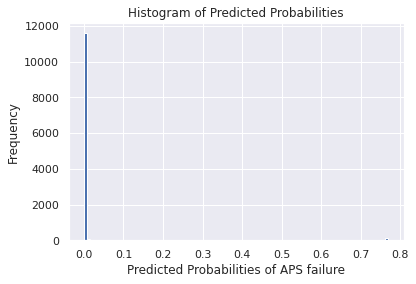

In [0]:
#histogram of class distribution
plt.hist(y_pred_prob, bins=100)
plt.title("Histogram of Predicted Probabilities")
plt.xlabel("Predicted Probabilities of APS failure")
plt.ylabel("Frequency")
plt.show()

This histogram clearly shows that most of the probabilities for the predicted
classifier lie in a range from 0.0 to 0.1, which is indeed very low. Unless we set
the threshold very low, we cannot increase the sensitivity of the model. Also, note
that sensitivity is inversely proportional to specificity, so when one increases, the
other decreases.

There is no universal value of the threshold, though the value of 0.5 is commonly used
as a default. One method for selecting the threshold is to plot a histogram and then
select the threshold manually. In our case, any threshold between 0.1 and 0.7 can be
used as the model as there are few predictions between those values, as can be seen
from the histogram that was produced at the end of the previous exercise

## ROC curve

In [0]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

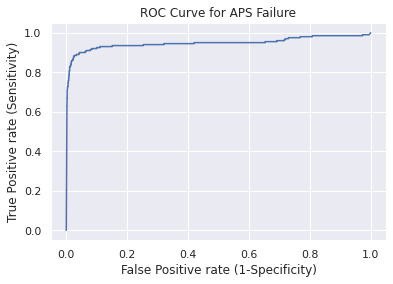

In [0]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.title("ROC Curve for APS Failure")
plt.xlabel("False Positive rate (1-Specificity)")
plt.ylabel("True Positive rate (Sensitivity)")
plt.grid(True)
plt.show()

In [0]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)

0.9481006355932203

# Imbalance Data set ML on Bank deposit dataset

## Benchmark_Logistic_Regression_Model

In this exercise, we will be analyzing the problem of predicting whether a customer will
buy a term deposit. For this, you will be fitting a logistic regression model, as you did in
Chapter 3, Binary Classification, and you will look closely at the metrics:

In [0]:
# Defining data path of Github repository

filename = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter13/Dataset/bank-full.csv'
# Loading the data using pandas

bankData = pd.read_csv(filename,sep=";")
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [0]:
bankData.shape

(45211, 17)

In [0]:
a=bankData['age'].values.reshape(-1,1)
print(a.shape)
a

(45211, 1)


array([[58],
       [44],
       [33],
       ...,
       [72],
       [57],
       [37]])

In [0]:
# Converting each of the columns to scaled version
bankData['ageScaled'] = StandardScaler().fit_transform(bankData['age'].values.reshape(-1,1))
bankData['balScaled'] = StandardScaler().fit_transform(bankData['balance'].values.reshape(-1,1))
bankData['durScaled'] = StandardScaler().fit_transform(bankData['duration'].values.reshape(-1,1))

In [0]:
# Dropping the original columns
bankData.drop(['age','balance','duration'], axis=1, inplace=True)

In [0]:
bankData.head()

,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y,ageScaled,balScaled,durScaled
0,management,married,tertiary,no,yes,no,unknown,5,may,1,-1,0,unknown,no,1.606965,0.256419,0.011016
1,technician,single,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,no,0.288529,-0.437895,-0.416127
2,entrepreneur,married,secondary,no,yes,yes,unknown,5,may,1,-1,0,unknown,no,-0.747384,-0.446762,-0.707361
3,blue-collar,married,unknown,no,yes,no,unknown,5,may,1,-1,0,unknown,no,0.571051,0.047205,-0.645231
4,unknown,single,unknown,no,no,no,unknown,5,may,1,-1,0,unknown,no,-0.747384,-0.447091,-0.233620


In [0]:
bankCat = pd.get_dummies(bankData[['job','marital','education','default',
'housing','loan','contact','month','poutcome']])

In [0]:
bankNum = bankData[['ageScaled','balScaled','day','durScaled',
'campaign','pdays','previous']]

In [0]:
# Merging with the original data frame
# Preparing the X variables
X = pd.concat([bankCat, bankNum], axis=1)
print(X.shape)
# Preparing the Y variable
y = bankData['y']
print(Y.shape)
X.head()

(45211, 51)
(45211,)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,ageScaled,balScaled,day,durScaled,campaign,pdays,previous
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1.606965,0.256419,5,0.011016,1,-1,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.288529,-0.437895,5,-0.416127,1,-1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,-0.747384,-0.446762,5,-0.707361,1,-1,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.571051,0.047205,5,-0.645231,1,-1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,-0.747384,-0.447091,5,-0.233620,1,-1,0


In [0]:
X.shape

(45211, 51)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y,
                                                    random_state=123)
print(X_train.shape)
print(X_test.shape)
X_train.head()

(31647, 51)
(13564, 51)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,ageScaled,balScaled,day,durScaled,campaign,pdays,previous
44828,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,-0.653211,0.636748,17,-0.365646,5,92,6
11344,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0.571051,-0.281888,18,-0.396711,3,-1,0
28435,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,-1.406602,-0.396512,29,0.127510,1,244,4
39971,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,-1.689124,1.045323,3,-0.225854,1,-1,0
5747,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.571051,-0.384688,26,-0.179257,1,-1,0


In [0]:
# Defining the LogisticRegression function
bankModel = LogisticRegression()
bankModel.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pred = bankModel.predict(X_test)
print('Accuracy of Logistic regression model prediction on test set: {:.2f}'.
format(bankModel.score(X_test, y_test)))

Accuracy of Logistic regression model prediction on test set: 0.90


In [0]:
# Confusion Matrix for the model
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

[[11714   263]
 [ 1079   508]]
              precision    recall  f1-score   support

          no       0.92      0.98      0.95     11977
         yes       0.66      0.32      0.43      1587

    accuracy                           0.90     13564
   macro avg       0.79      0.65      0.69     13564
weighted avg       0.89      0.90      0.89     13564



Null accuracy

In [0]:
y_test.value_counts(normalize=True)

no     0.882999
yes    0.117001
Name: y, dtype: float64

## Strategies for Dealing with Imbalanced Datasets

## 1. Collecting More Data

Having encountered an imbalanced dataset, one of the first questions you need to ask
is whether it is possible to get more data. This might appear naïve, but collecting more
data, especially from the minority class, and then balancing the dataset should be the
first strategy for addressing the class imbalance.

## 2. Resampling Data

the idea behind resampling is to randomly pick samples from the
majority class to make the final dataset more balanced. In the diagram, we can see that
the minority class has the same number of examples as the original dataset and that the
majority class is under-sampled to make the final dataset more balanced. Resampling
examples of this type is called random undersampling as we are undersampling the
majority class. We will perform random undersampling in the following exercise.

In [0]:
# Let us first join the train_x and train_y for ease of operation
trainData = pd.concat([X_train,y_train],axis=1)
trainData.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,ageScaled,balScaled,day,durScaled,campaign,pdays,previous,y
44828,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,-0.653211,0.636748,17,-0.365646,5,92,6,yes
11344,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0.571051,-0.281888,18,-0.396711,3,-1,0,no
28435,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,-1.406602,-0.396512,29,0.127510,1,244,4,no
39971,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,-1.689124,1.045323,3,-0.225854,1,-1,0,no
5747,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.571051,-0.384688,26,-0.179257,1,-1,0,no


In [0]:
# Finding the indexes of the sample data set where the propensity is 'yes'
ind = trainData[trainData['y']=='yes'].index
print(len(ind))

3702


In [0]:
# Seperate the minority classes
minData = trainData.loc[ind]
print(minData.shape)

(3702, 52)


In [0]:

# Finding indexes of majority class
ind1 = trainData[trainData['y']=='no'].index
print(len(ind1))

27945


In [0]:
# Seperating the majority class
majData = trainData.loc[ind1]
print(majData.shape)
majData.head()

(27945, 52)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,ageScaled,balScaled,day,durScaled,campaign,pdays,previous,y
11344,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0.571051,-0.281888,18,-0.396711,3,-1,0,no
28435,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,-1.406602,-0.396512,29,0.127510,1,244,4,no
39971,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,-1.689124,1.045323,3,-0.225854,1,-1,0,no
5747,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.571051,-0.384688,26,-0.179257,1,-1,0,no
115,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.288529,-0.400125,5,-0.043348,2,-1,0,no


In [0]:
# Take a random sample equal to length of the minority class to make the data set balanced

majSample = majData.sample(n=len(ind),random_state = 123)
print(majSample.shape)
majSample.head()

(3702, 52)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,ageScaled,balScaled,day,durScaled,campaign,pdays,previous,y
5754,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1.230269,-0.397169,26,-0.715127,1,-1,0,no
17288,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,-1.406602,-0.420816,28,-0.757841,2,-1,0,no
17994,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,-0.841558,-0.445120,30,-0.889867,3,-1,0,no
2060,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,-1.500776,-0.338050,12,0.546886,3,-1,0,no
43646,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,-0.653211,-0.046399,6,-0.295750,1,90,8,no


In [0]:
# Concatinating both data sets and then shuffling the data set

balData = pd.concat([minData,majSample],axis = 0)
print('balanced data set shape',balData.shape)

balanced data set shape (7404, 52)


In [0]:
# Shuffling the data set
from sklearn.utils import shuffle

balData = shuffle(balData)
balData.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,ageScaled,balScaled,day,durScaled,campaign,pdays,previous,y
44067,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.194355,0.994087,2,1.451653,2,85,1,yes
42225,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1.136095,0.998028,11,-0.066646,1,92,1,yes
479,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,-0.182341,0.169055,6,-0.284101,1,-1,0,no
43335,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,-1.783298,-0.354472,22,-0.016166,2,-1,0,yes
35860,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1.418617,-0.140332,8,-0.190906,2,172,1,no


In [0]:
# Making the new X_train and y_train

X_trainNew = balData.iloc[:,0:51]
print(X_trainNew.head())

y_trainNew = balData['y']
print(y_trainNew.head())

       job_admin.  job_blue-collar  job_entrepreneur  ...  campaign  pdays  previous
44067           0                0                 0  ...         2     85         1
42225           0                1                 0  ...         1     92         1
479             0                0                 0  ...         1     -1         0
43335           0                0                 0  ...         2     -1         0
35860           0                0                 0  ...         2    172         1

[5 rows x 51 columns]
44067    yes
42225    yes
479       no
43335    yes
35860     no
Name: y, dtype: object


In [0]:
bankModel1 = LogisticRegression()
bankModel1.fit(X_trainNew, y_trainNew)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Predicting on the test
pred = bankModel1.predict(X_test)
print('Accuracy on test set for balanced data set: {:.2f}'.format(bankModel1.score(X_test, y_test)))

Accuracy on test set for balanced data set: 0.83


In [0]:
# Confusion Matrix for the model
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

[[10049  1928]
 [  315  1272]]
              precision    recall  f1-score   support

          no       0.97      0.84      0.90     11977
         yes       0.40      0.80      0.53      1587

    accuracy                           0.83     13564
   macro avg       0.68      0.82      0.72     13564
weighted avg       0.90      0.83      0.86     13564



DNN: false negative decrease mean we can take more real customer (positive), but false positive increase mean we must take care more customer who are unlikely to buy term deposits

From ebook:

Let's analyze the results and compare them with those of the benchmark logistic
regression model that we built at the beginning of this chapter. In the benchmark
model, we had the problem of the model being biased toward the majority class with a
very low recall value for the yes cases.

Now, by balancing the dataset, we have seen that the recall for the minority class
has improved tremendously, from a low of 0.32 to around 0.82. This means that by
balancing the dataset, the classifier has improved its ability to identify negative cases.

However, we can see that our overall accuracy has taken a hit. From a high of around
90%, it has come down to around 85%. One major area where accuracy has taken a hit
is the number of false positives, which are those No cases that were wrongly predicted
as Yes.

 However, the
flip side of this is that the sales team will also have to spend a lot of time on customers
who are unlikely to buy term deposits. From the confusion matrix, we can see that false
negatives have gone up to 1,795 from the earlier 291 we got in the benchmark model.
Ideally, we would want quadrants 2 and 3 to come down in favor of the other
two quadrants.

## 3. Generating synthetic samples

In the previous section, we looked at the undersampling method, where we downsized
the majority class to make the dataset balanced. However, when undersampling,
we reduced the size of the dataset. In many circumstances, downsizing the dataset
can have adverse effects on the predictive power of the classifier. An effective
way to counter the downsizing of the dataset is to oversample the minority class.
Oversampling is done by generating new synthetic data points similar to those of the
minority class, thereby balancing the dataset.

Two very popular methods for generating such synthetic points are:

• Synthetic Minority Oversampling Technique (SMOTE)

• Modified SMOTE (MSMOTE)

### SMOTE on Banking Dataset

In [0]:
!pip install smote-variants

In [0]:
import smote_variants as sv

In [0]:
# Shape before oversampling
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))
print("Before OverSampling count of yes: {}".format(sum(y_train=='yes')))
print("Before OverSampling count of no: {} \n".format(sum(y_train=='no')))

Before OverSampling, the shape of train_X: (31647, 51)
Before OverSampling, the shape of train_y: (31647,) 

Before OverSampling count of yes: 3702
Before OverSampling count of no: 27945 



In [0]:
# Instantiating the SMOTE class
oversampler= sv.SMOTE()

In [0]:
# Creating new training set
X_train_os, y_train_os = oversampler.sample(np.array(X_train), np.array(y_train))

2020-05-26 00:50:25,542:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


In [0]:
# Shape after oversampling
print('After OverSampling, the shape of train_X: {}'.format(X_train_os.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_os.shape))
print("After OverSampling, counts of label 'Yes': {}".format(sum(y_train_os=='yes')))
print("After OverSampling, counts of label 'no': {}".format(sum(y_train_os=='no')))

After OverSampling, the shape of train_X: (55890, 51)
After OverSampling, the shape of train_y: (55890,) 

After OverSampling, counts of label 'Yes': 27945
After OverSampling, counts of label 'no': 27945


In [0]:
bankModel2 = LogisticRegression()
bankModel2.fit(X_train_os, y_train_os)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pred = bankModel2.predict(X_test)
print('Accuracy test set for Smote balanced data set: {:.2f}'.
      format(bankModel2.score(X_test, y_test)))

Accuracy test set for Smote balanced data set: 0.84


In [0]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)
print(classification_report(y_test, pred))

[[10079  1898]
 [  326  1261]]
              precision    recall  f1-score   support

          no       0.97      0.84      0.90     11977
         yes       0.40      0.79      0.53      1587

    accuracy                           0.84     13564
   macro avg       0.68      0.82      0.72     13564
weighted avg       0.90      0.84      0.86     13564



From the generated metrics, we can see that the results are very similar to the
undersampling results, with the exception that the recall value of the 'Yes' cases has
reduced from 0.82 to around 0.81. The results that are generated vary from one use
case to the next. SMOTE and its variants have been proven to have robust results in
balancing data and are therefore the most popular methods used when encountering
use cases with highly imbalanced data.

### MSMOTE on Banking Data set

In [0]:
# Shape before oversampling
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))
print("Before OverSampling count of yes: {}".format(sum(y_train=='yes')))
print("Before OverSampling count of no: {} \n".format(sum(y_train=='no')))

Before OverSampling, the shape of train_X: (31647, 51)
Before OverSampling, the shape of train_y: (31647,) 

Before OverSampling count of yes: 3702
Before OverSampling count of no: 27945 



In [0]:
oversampler= sv.MSMOTE()

In [0]:
# Creating new training set
X_train_os, y_train_os = oversampler.sample(np.array(X_train), np.array(y_train))

2020-05-26 00:55:13,253:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


In [0]:
# Shape after oversampling
print('After OverSampling, the shape of train_X: {}'.format(X_train_os.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_os.shape))
print("After OverSampling, counts of label 'Yes': {}".format(sum(y_train_os=='yes')))
print("After OverSampling, counts of label 'no': {}".format(sum(y_train_os=='no')))

After OverSampling, the shape of train_X: (55890, 51)
After OverSampling, the shape of train_y: (55890,) 

After OverSampling, counts of label 'Yes': 27945
After OverSampling, counts of label 'no': 27945


In [0]:
# Defining the LogisticRegression function
bankModel3 = LogisticRegression()
bankModel3.fit(X_train_os, y_train_os)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pred = bankModel3.predict(X_test)
print ('Accuracy on test set for MSMOTE on \
balanced data set: {:.2f}'.format(bankModel3.score(X_test, y_test)))

Accuracy on test set for MSMOTE on balanced data set: 0.83


In [0]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)
print(classification_report(y_test, pred))

[[10077  1900]
 [  345  1242]]
              precision    recall  f1-score   support

          no       0.97      0.84      0.90     11977
         yes       0.40      0.78      0.53      1587

    accuracy                           0.83     13564
   macro avg       0.68      0.81      0.71     13564
weighted avg       0.90      0.83      0.86     13564



From the implementation of MSMOTE, it is seen that the metrics have degraded compared
to the SMOTE implementation from Exercise 13.03, Implementing SMOTE on Our Banking
Dataset to Find the Optimal Result. We can then conclude that MSMOTE might not be the
best method for this use case.

# Applying Balancing Techiniques on a Telecom Dataset

This dataset has various variables related to the usage level of a mobile connection,
such as total call minutes, call charges, calls made during certain periods of the day,
details of international calls, and details of calls to customer services.
The problem statement is to predict whether a customer will churn. This dataset is a
highly imbalanced one, with the cases where customers churn being the minority. You
will be using this dataset in the following activity

In [0]:

# Loading data from the Github repository
import pandas as pd
filename = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter13/Dataset/churn.csv'
# Loading the data using pandas

churnData = pd.read_csv(filename,sep=",")
churnData.head()

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,No,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,No,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,No,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,No,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,No,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [0]:
churnData.shape

(5000, 18)

In [0]:
churnData.dtypes

churn                          object
accountlength                   int64
internationalplan              object
voicemailplan                  object
numbervmailmessages             int64
totaldayminutes               float64
totaldaycalls                   int64
totaldaycharge                float64
totaleveminutes               float64
totalevecalls                   int64
totalevecharge                float64
totalnightminutes             float64
totalnightcalls                 int64
totalnightcharge              float64
totalintlminutes              float64
totalintlcalls                  int64
totalintlcharge               float64
numbercustomerservicecalls      int64
dtype: object

In [0]:
X = churnData.drop('churn',axis=1) 
y = churnData['churn']

Need get dummies or one hot encoder all object data for reprocess later (only for imbalance data set)

In [0]:
X_dum=pd.get_dummies(X)

In [0]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.2,
                                                    #shuffle=True ,
                                                    stratify=y,random_state=123)
print(X_train.shape)
print(X_test.shape)
X_train.head()

(4000, 19)
(1000, 19)


,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls,internationalplan_no,internationalplan_yes,voicemailplan_no,voicemailplan_yes
4690,138,0,54.8,123,9.32,147.5,76,12.54,173.6,119,7.81,11.5,1,3.11,1,1,0,1,0
2518,53,0,145.1,116,24.67,233.7,82,19.86,208.7,95,9.39,7.9,5,2.13,2,1,0,1,0
2777,20,0,186.8,89,31.76,253.4,51,21.54,273.1,105,12.29,12.3,6,3.32,2,1,0,1,0
2526,57,0,115.0,65,19.55,122.3,96,10.40,245.0,75,11.03,6.4,1,1.73,0,0,1,1,0
1106,86,0,190.5,115,32.39,179.6,130,15.27,258.5,89,11.63,10.1,5,2.73,3,1,0,1,0


In [0]:
X_train.dtypes

accountlength                   int64
numbervmailmessages             int64
totaldayminutes               float64
totaldaycalls                   int64
totaldaycharge                float64
totaleveminutes               float64
totalevecalls                   int64
totalevecharge                float64
totalnightminutes             float64
totalnightcalls                 int64
totalnightcharge              float64
totalintlminutes              float64
totalintlcalls                  int64
totalintlcharge               float64
numbercustomerservicecalls      int64
internationalplan_no            uint8
internationalplan_yes           uint8
voicemailplan_no                uint8
voicemailplan_yes               uint8
dtype: object

In [0]:
X_train.shape

(4000, 19)

In [0]:

#Standard scaler all numeric value
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
numeric_features = X_train.select_dtypes(include=['int64', 'float64','uint8']).columns

#One hot encoder all category value
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
categorical_features = X.select_dtypes(include=['object']).columns

transformers=[
    ('numeric', numeric_transformer, numeric_features),
    #('categoric', categorical_transformer, categorical_features),
    #('numeric', numeric_transformer, selector(dtype_exclude="object")),
    #('categoric', categorical_transformer, selector(dtype_include="object")),
    #('imputer', imputer_transformer, numeric_features),
    
]
preprocessor = ColumnTransformer(transformers)

Keep Track of Column Labels after transforming

In [0]:
# Create transform X value
X_test_tran=preprocessor.fit_transform(X_test)
X_train_tran=preprocessor.fit_transform(X_train)

print(X_train_tran.shape) # Shape 16 , thêm 4 mặc dù 5category transform do không tính 1 feature chính nó
temp_df=pd.DataFrame(X_train_tran)
temp_df.head()

(4000, 19)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.959537,-0.563522,-2.311949,1.150923,-2.311585,-1.051524,-1.220189,-1.050993,-0.532470,0.964078,-0.533391,0.447554,-1.385933,0.453646,-0.445482,0.322107,-0.322107,0.590053,-0.590053
1,-1.191848,-0.563522,-0.647346,0.798065,-0.647087,0.669156,-0.917306,0.668045,0.162996,-0.240847,0.162288,-0.868997,0.248301,-0.873834,0.322591,0.322107,-0.322107,0.590053,-0.590053
2,-2.027092,-0.563522,0.121357,-0.562960,0.121727,1.062397,-2.482201,1.062578,1.439007,0.261205,1.439167,0.740121,0.656860,0.738106,0.322591,0.322107,-0.322107,0.590053,-0.590053
3,-1.090606,-0.563522,-1.202214,-1.772760,-1.202281,-1.554554,-0.210579,-1.553554,0.882238,-1.244951,0.884385,-1.417559,-1.385933,-1.415662,-1.213555,-3.104561,3.104561,0.590053,-0.590053
4,-0.356605,-0.563522,0.189564,0.747656,0.190042,-0.410760,1.505757,-0.409877,1.149725,-0.542078,1.148567,-0.064438,0.248301,-0.061091,1.090663,0.322107,-0.322107,0.590053,-0.590053


In [0]:
# Keep track transformer colum names:
def get_transformer_feature_names(columnTransformer): #mean: preprocessor 

    output_features = []

    for name, pipe, features in columnTransformer.transformers_:
        if name!='remainder':
            for i in pipe:
                trans_features = []
                if hasattr(i,'categories_'):
                    trans_features.extend(i.get_feature_names(features))
                else:
                    trans_features = features
            output_features.extend(trans_features)

    return output_features
print(len(get_transformer_feature_names(preprocessor)))
get_transformer_feature_names(preprocessor)

19


['accountlength',
 'numbervmailmessages',
 'totaldayminutes',
 'totaldaycalls',
 'totaldaycharge',
 'totaleveminutes',
 'totalevecalls',
 'totalevecharge',
 'totalnightminutes',
 'totalnightcalls',
 'totalnightcharge',
 'totalintlminutes',
 'totalintlcalls',
 'totalintlcharge',
 'numbercustomerservicecalls',
 'internationalplan_no',
 'internationalplan_yes',
 'voicemailplan_no',
 'voicemailplan_yes']

In [0]:
#Apply name to X_train and X_test after transformer
X_train_tran_df=pd.DataFrame(X_train_tran, 
             columns=get_transformer_feature_names(preprocessor))
X_test_tran_df=pd.DataFrame(X_test_tran, 
             columns=get_transformer_feature_names(preprocessor))
X_train_tran_df.head()

,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls,internationalplan_no,internationalplan_yes,voicemailplan_no,voicemailplan_yes
0,0.959537,-0.563522,-2.311949,1.150923,-2.311585,-1.051524,-1.220189,-1.050993,-0.532470,0.964078,-0.533391,0.447554,-1.385933,0.453646,-0.445482,0.322107,-0.322107,0.590053,-0.590053
1,-1.191848,-0.563522,-0.647346,0.798065,-0.647087,0.669156,-0.917306,0.668045,0.162996,-0.240847,0.162288,-0.868997,0.248301,-0.873834,0.322591,0.322107,-0.322107,0.590053,-0.590053
2,-2.027092,-0.563522,0.121357,-0.562960,0.121727,1.062397,-2.482201,1.062578,1.439007,0.261205,1.439167,0.740121,0.656860,0.738106,0.322591,0.322107,-0.322107,0.590053,-0.590053
3,-1.090606,-0.563522,-1.202214,-1.772760,-1.202281,-1.554554,-0.210579,-1.553554,0.882238,-1.244951,0.884385,-1.417559,-1.385933,-1.415662,-1.213555,-3.104561,3.104561,0.590053,-0.590053
4,-0.356605,-0.563522,0.189564,0.747656,0.190042,-0.410760,1.505757,-0.409877,1.149725,-0.542078,1.148567,-0.064438,0.248301,-0.061091,1.090663,0.322107,-0.322107,0.590053,-0.590053


## Undersampling Method

In [0]:

# let us first join the train_x and train_y for ease of operation

trainData = pd.concat([X_train,y_train],axis=1)
trainData.head()

,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls,internationalplan_no,internationalplan_yes,voicemailplan_no,voicemailplan_yes,churn
4690,138,0,54.8,123,9.32,147.5,76,12.54,173.6,119,7.81,11.5,1,3.11,1,1,0,1,0,No
2518,53,0,145.1,116,24.67,233.7,82,19.86,208.7,95,9.39,7.9,5,2.13,2,1,0,1,0,No
2777,20,0,186.8,89,31.76,253.4,51,21.54,273.1,105,12.29,12.3,6,3.32,2,1,0,1,0,No
2526,57,0,115.0,65,19.55,122.3,96,10.40,245.0,75,11.03,6.4,1,1.73,0,0,1,1,0,Yes
1106,86,0,190.5,115,32.39,179.6,130,15.27,258.5,89,11.63,10.1,5,2.73,3,1,0,1,0,No


In [0]:
# Finding the indexes of the sample data set where the churn  is 'yes'
ind = trainData[trainData['churn']=='Yes'].index
print(len(ind))

566


In [0]:

# Seperate the minority classes
minData = trainData.loc[ind]
print(minData.shape)

(566, 20)


In [0]:
# Finding indexes of majority class
ind1 = trainData[trainData['churn']=='No'].index
print(len(ind1))

3434


In [0]:
# Seperating the majority class
majData = trainData.loc[ind1]
print(majData.shape)
majData.head()

(3434, 20)


,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls,internationalplan_no,internationalplan_yes,voicemailplan_no,voicemailplan_yes,churn
4690,138,0,54.8,123,9.32,147.5,76,12.54,173.6,119,7.81,11.5,1,3.11,1,1,0,1,0,No
2518,53,0,145.1,116,24.67,233.7,82,19.86,208.7,95,9.39,7.9,5,2.13,2,1,0,1,0,No
2777,20,0,186.8,89,31.76,253.4,51,21.54,273.1,105,12.29,12.3,6,3.32,2,1,0,1,0,No
1106,86,0,190.5,115,32.39,179.6,130,15.27,258.5,89,11.63,10.1,5,2.73,3,1,0,1,0,No
65,40,41,148.1,74,25.18,169.5,88,14.41,214.1,102,9.63,6.2,5,1.67,2,1,0,0,1,No


In [0]:
# Take a random sample equal to length of the minority class to make the data set balanced

majSample = majData.sample(n=len(ind),random_state = 123)
print(majSample.shape)
majSample.head()

(566, 20)


,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls,internationalplan_no,internationalplan_yes,voicemailplan_no,voicemailplan_yes,churn
1449,192,0,221.6,101,37.67,285.2,50,24.24,167.4,83,7.53,12.7,6,3.43,4,1,0,1,0,No
3952,100,0,129.4,69,22.00,251.3,73,21.36,157.1,92,7.07,10.4,3,2.81,1,1,0,1,0,No
3102,100,32,125.2,123,21.28,230.9,101,19.63,192.0,106,8.64,12.6,9,3.40,3,1,0,0,1,No
403,119,0,222.8,122,37.88,163.2,107,13.87,160.6,112,7.23,11.2,6,3.02,1,1,0,1,0,No
1398,98,19,110.5,87,18.79,227.8,97,19.36,243.6,84,10.96,11.0,4,2.97,1,1,0,0,1,No


In [0]:
# Concatenating both data sets

balData = pd.concat([minData,majSample],axis = 0)
print('balanced data set shape',balData.shape)

balanced data set shape (1132, 20)


In [0]:
# Shuffling the data set
balData = shuffle(balData)

In [0]:
# Making the new X_train and y_train

X_trainNew = balData.iloc[:,0:19]
X_trainNew.shape

# Making the new y_train
y_trainNew = balData['churn']
y_trainNew.shape

(1132,)

### Spot check different models

In [0]:
# Creating a list of the classifiers
classifiers = {
    'KNN':KNeighborsClassifier(),     
    'LR':LogisticRegression(),
    'LDA':LinearDiscriminantAnalysis(), 
    'CART':DecisionTreeClassifier(),
    'NB':GaussianNB(),
    'SVC':SVC(),
    #Ensemble:
    'RF':RandomForestClassifier(), #Bagging
    'AB':AdaBoostClassifier(),  #Boosting
    'GBM':GradientBoostingClassifier(), #Boosting
    'ET':ExtraTreesClassifier(), #Bagging
    #New from Matt cookbook
    'XGB':XGBClassifier(), #New
    'LGBM':LGBMClassifier(), #New
    
}

In [0]:
import time
num_folds = 5
seed = 7
scoring = 'accuracy'

results = []
names = []
time_=[]
cv_results_mean=[]
cv_results_std=[]


for name, model in classifiers.items():
  #print(name)
  start = time.time()
  estimator = Pipeline(steps=[('preprocessor', preprocessor),
                        # ('dimred', PCA(n_components=8)),
                           ('classifier',model)])
  
  kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=True)
  cv_results = cross_val_score(estimator, X_trainNew, y_trainNew, cv=kfold, scoring=scoring)

  results.append(cv_results) # array of values
  names.append(name)
  cv_results_mean.append(cv_results.mean()) # one values
  cv_results_std.append(cv_results.std()) # one values

  print("%s: Accuracy: %0.2f (+/- %0.2f)" % (name, cv_results.mean(), cv_results.std() * 2))
  time_cal=time.time() - start
  print('time : %0.3f' % (time_cal),'\n')
  time_.append(time_cal)

KNN: Accuracy: 0.80 (+/- 0.05)
time : 0.124 

LR: Accuracy: 0.77 (+/- 0.05)
time : 0.126 

LDA: Accuracy: 0.76 (+/- 0.05)
time : 0.113 

CART: Accuracy: 0.79 (+/- 0.04)
time : 0.140 

NB: Accuracy: 0.80 (+/- 0.05)
time : 0.054 

SVC: Accuracy: 0.83 (+/- 0.03)
time : 0.268 

RF: Accuracy: 0.87 (+/- 0.04)
time : 1.395 

AB: Accuracy: 0.80 (+/- 0.06)
time : 0.890 

GBM: Accuracy: 0.87 (+/- 0.03)
time : 1.838 

ET: Accuracy: 0.86 (+/- 0.05)
time : 0.903 

XGB: Accuracy: 0.88 (+/- 0.03)
time : 0.567 

LGBM: Accuracy: 0.88 (+/- 0.03)
time : 0.817 



In [0]:
df_results=pd.DataFrame(list(zip(names,cv_results_mean,cv_results_std,time_)),
                  columns=['Names','CV_mean','CV_std','Time'])
df_results=df_results.sort_values(by='CV_mean',ascending=False)
df_results

,Names,CV_mean,CV_std,Time
10,XGB,0.875471,0.016862,0.566923
11,LGBM,0.875459,0.013635,0.816630
8,GBM,0.874586,0.014692,1.838185
6,RF,0.871947,0.020280,1.394631
9,ET,0.863109,0.022636,0.902780
5,SVC,0.833063,0.014591,0.267663
4,NB,0.801255,0.024393,0.053828
0,KNN,0.800378,0.024659,0.123702
7,AB,0.797751,0.029291,0.889546
3,CART,0.787950,0.022167,0.140201


In [0]:
X_trainNew.shape

(1132, 19)

In [0]:
X_trainNew.head()

,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls,internationalplan_no,internationalplan_yes,voicemailplan_no,voicemailplan_yes
2719,119,19,178.1,110,30.28,212.8,100,18.09,226.3,123,10.18,10.0,6,2.70,1,1,0,0,1
3461,110,0,135.1,99,22.97,227.3,123,19.32,176.0,110,7.92,13.2,4,3.56,1,0,1,1,0
611,90,0,193.7,83,32.93,154.2,79,13.11,299.0,60,13.46,12.7,3,3.43,1,1,0,1,0
1322,2,0,132.1,42,22.46,138.9,88,11.81,192.6,119,8.67,9.1,1,2.46,2,0,1,1,0
2535,125,0,113.0,108,19.21,169.2,107,14.38,156.6,61,7.05,9.2,5,2.48,2,1,0,1,0


In [0]:
y_trainNew.head()

2719     No
3461    Yes
611      No
1322    Yes
2535    Yes
Name: churn, dtype: object

In [0]:
print(type(X_trainNew))
print(type(y_trainNew))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [0]:
churnModel1 = Pipeline(steps=[('preprocessor', preprocessor),
                        # ('dimred', PCA(n_components=8)),
                           ('classifier',ExtraTreesClassifier())])
churnModel1.fit(X_trainNew, y_trainNew)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  Index(['accountlength', 'numbervmailmessages', 'totaldayminutes',
       'totaldaycalls'...
                 ExtraTreesClassifier(boots

## SMOTE

In [0]:
!pip install smote_variants

In [0]:
import smote_variants as sv
# Instantiating the SMOTE class
oversampler= sv.SMOTE()

Luu y: du lieu phai duoc label encoder od get dummies truoc khi thuc hien oversampler

In [0]:

# Creating new training set

X_train_smote, y_train_smote = oversampler.sample(np.array(X_train), np.array(y_train))

2020-05-26 07:46:18,509:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


In [0]:
X_train_smote.shape

(6868, 19)

In [0]:
y_train_smote

array(['No', 'No', 'No', ..., 'Yes', 'Yes', 'Yes'], dtype=object)

In [0]:
print(type(X_train_smote))
print(type(y_train_smote))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
print(type(X_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [0]:
y_train_smote_df=pd.DataFrame(y_train_smote)
y_train_smote_df.head()

,0
0,No
1,No
2,No
3,Yes
4,No


In [0]:
y_train_smote_df[0].value_counts()

No     3434
Yes    3434
Name: 0, dtype: int64

In [0]:
X_train_smote_df=pd.DataFrame(X_train_smote,columns=X_train_tran_df.columns)
X_train_smote_df.head()

,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls,internationalplan_no,internationalplan_yes,voicemailplan_no,voicemailplan_yes
0,138.0,0.0,54.8,123.0,9.32,147.5,76.0,12.54,173.6,119.0,7.81,11.5,1.0,3.11,1.0,1.0,0.0,1.0,0.0
1,53.0,0.0,145.1,116.0,24.67,233.7,82.0,19.86,208.7,95.0,9.39,7.9,5.0,2.13,2.0,1.0,0.0,1.0,0.0
2,20.0,0.0,186.8,89.0,31.76,253.4,51.0,21.54,273.1,105.0,12.29,12.3,6.0,3.32,2.0,1.0,0.0,1.0,0.0
3,57.0,0.0,115.0,65.0,19.55,122.3,96.0,10.40,245.0,75.0,11.03,6.4,1.0,1.73,0.0,0.0,1.0,1.0,0.0
4,86.0,0.0,190.5,115.0,32.39,179.6,130.0,15.27,258.5,89.0,11.63,10.1,5.0,2.73,3.0,1.0,0.0,1.0,0.0


Luu y: du lieu X_train_smote phai duoc chuyen ve dataframe voi columns trung voi X_train ban dau moi co the ap dung pipeline. Nguyen nhan: preprocessor ap dung cho X_train.columns.select_dtypes (X_train sau khi da pd.get_dummies voi colummn name xac dinh). Phai get dummies truoc khi thuc hien train test split do oversample ap dung cho X_train khi cac column da duoc get dummies

In [0]:
churnModel2 = Pipeline(steps=[('preprocessor', preprocessor),
                        # ('dimred', PCA(n_components=8)),
                           ('classifier',ExtraTreesClassifier())])

churnModel2.fit(X_train_smote_df, y_train_smote)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  Index(['accountlength', 'numbervmailmessages', 'totaldayminutes',
       'totaldaycalls'...
                 ExtraTreesClassifier(boots

## MSMOTE

In [0]:
# Instantiating the MSMOTE class
oversampler= sv.MSMOTE()

In [0]:
X_train_msmote, y_train_msmote = oversampler.sample(np.array(X_train), np.array(y_train))

2020-05-26 08:01:42,214:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


In [0]:
X_train_msmote_df=pd.DataFrame(X_train_msmote,columns=X_train_tran_df.columns)
X_train_msmote_df.head()

,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls,internationalplan_no,internationalplan_yes,voicemailplan_no,voicemailplan_yes
0,138.0,0.0,54.8,123.0,9.32,147.5,76.0,12.54,173.6,119.0,7.81,11.5,1.0,3.11,1.0,1.0,0.0,1.0,0.0
1,53.0,0.0,145.1,116.0,24.67,233.7,82.0,19.86,208.7,95.0,9.39,7.9,5.0,2.13,2.0,1.0,0.0,1.0,0.0
2,20.0,0.0,186.8,89.0,31.76,253.4,51.0,21.54,273.1,105.0,12.29,12.3,6.0,3.32,2.0,1.0,0.0,1.0,0.0
3,57.0,0.0,115.0,65.0,19.55,122.3,96.0,10.40,245.0,75.0,11.03,6.4,1.0,1.73,0.0,0.0,1.0,1.0,0.0
4,86.0,0.0,190.5,115.0,32.39,179.6,130.0,15.27,258.5,89.0,11.63,10.1,5.0,2.73,3.0,1.0,0.0,1.0,0.0


In [0]:
churnModel3 = Pipeline(steps=[('preprocessor', preprocessor),
                        # ('dimred', PCA(n_components=8)),
                           ('classifier',ExtraTreesClassifier())])

churnModel3.fit(X_train_msmote_df, y_train_msmote)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  Index(['accountlength', 'numbervmailmessages', 'totaldayminutes',
       'totaldaycalls'...
                 ExtraTreesClassifier(boots

## Predictions with all three models

In [0]:
# Predicting using Under sampler
pred_us = churnModel1.predict(X_test)

# Predicting using SMOTE
pred_smote = churnModel2.predict(X_test)

# Predicting using MSMOTE
pred_msmote = churnModel3.predict(X_test)

In [0]:
# Printing accuracy of each model

print('Accuracy on test set for Random Undersampled data set: {:.2f}'.format(churnModel1.score(X_test, y_test)))

print('Accuracy on test set for SMOTE data set: {:.2f}'.format(churnModel2.score(X_test, y_test)))

print('Accuracy on test set for MSMOTE data set: {:.2f}'.format(churnModel3.score(X_test, y_test)))

Accuracy on test set for Random Undersampled data set: 0.89
Accuracy on test set for SMOTE data set: 0.21
Accuracy on test set for MSMOTE data set: 0.94


In [0]:
# Metrics for Random undersample data set
print(confusion_matrix(y_test, pred_us))

print(classification_report(y_test, pred_us))

[[773  86]
 [ 26 115]]
              precision    recall  f1-score   support

          No       0.97      0.90      0.93       859
         Yes       0.57      0.82      0.67       141

    accuracy                           0.89      1000
   macro avg       0.77      0.86      0.80      1000
weighted avg       0.91      0.89      0.90      1000



In [0]:
# Metrics for SMOTE data set
print(confusion_matrix(y_test, pred_smote))

print(classification_report(y_test, pred_smote))

[[ 75 784]
 [ 10 131]]
              precision    recall  f1-score   support

          No       0.88      0.09      0.16       859
         Yes       0.14      0.93      0.25       141

    accuracy                           0.21      1000
   macro avg       0.51      0.51      0.20      1000
weighted avg       0.78      0.21      0.17      1000



In [0]:
# Metrics for MSMOTE data set
print(confusion_matrix(y_test, pred_msmote))

print(classification_report(y_test, pred_msmote))

[[850   9]
 [ 50  91]]
              precision    recall  f1-score   support

          No       0.94      0.99      0.97       859
         Yes       0.91      0.65      0.76       141

    accuracy                           0.94      1000
   macro avg       0.93      0.82      0.86      1000
weighted avg       0.94      0.94      0.94      1000

